# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Keisha Nabila Anindya
- **Email:** keishanabila08@gmail.com
- **ID Dicoding:** nyanab

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca, musim, dan waktu dalam perilaku penyewaan sepeda?
- Bagaimana pertumbuhan penyewaan sepeda oleh *registered users* pada tahun 2011 dan tahun 2012?



## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [5]:
# tabel hour_df
hour_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Disini terlihat bahwa tabel yang ditampilkan sudah sesuai dengan sumber maupun deskripsi yang diberikan dari sumber dataset Bike Sharing
- Disini juga terlihat bahwa tabel sukses dimuat menjadi sebuah dataframe dan siap untuk masuk ke proses selanjutnya

### Assessing Data

#### Menilai tabel `hour_df`

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan adanya data kosong, data duplikat, namun dteday harus diganti ke datetime
- Data di tabel bisa dibilang bersih

### Cleaning Data

In [9]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [10]:
print(hour_df.columns)
hour_df = hour_df.rename(columns={'hr':'hour',
                                  'dteday': 'datetime',
                                  'mnth':'month',
                                  'weathersit':'weather',
                                  'cnt':'count'})
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'datetime', 'season', 'yr', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


In [11]:
day = {'weekday': {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}}
season = {'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}}
weather = {'weather': {1: 'Cloudy', 2: 'Mist', 3: 'Rain', 4: 'Storm'}}

hour_df = hour_df.replace(day)
hour_df = hour_df.replace(season)
hour_df = hour_df.replace(weather)

In [12]:
hour_df['hour'] = hour_df['hour'].apply(lambda x: f"{x:02}:00")

In [13]:
hour_df.head()

,instant,datetime,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,00:00,0,Saturday,0,Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,01:00,0,Saturday,0,Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,02:00,0,Saturday,0,Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,03:00,0,Saturday,0,Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,04:00,0,Saturday,0,Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  object        
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

**Insight:**
- Saya mengubah dteday dari tipe object menjadi tipe datetime dan nama column agar lebih mudah dibaca
- Saya juga mengubah angka hari menjadi nama hari dan jam menjadi 4 digit
- Saya juga mengubah angka menjadi nama pada season dan weather

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [15]:
hour_df.describe(include="all")

,instant,datetime,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,24,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,17:00,NaN,Saturday,NaN,Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,730,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,NaN,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,NaN,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,NaN,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,NaN,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Untuk pertanyaan pertama

In [16]:
# per-jam
hour_df.groupby(by="hour").agg({"count": ["max", "min", "mean", "std"]})

count                            
        max min        mean         std
hour                                   
00:00   283   2   53.898072   42.307910
01:00   168   1   33.375691   33.538727
02:00   132   1   22.869930   26.578642
03:00    79   1   11.727403   13.239190
04:00    28   1    6.352941    4.143818
05:00    66   1   19.889819   13.200765
06:00   213   1   76.044138   55.084348
07:00   596   1  212.064649  161.441936
08:00   839   5  359.011004  235.189285
09:00   426  14  219.309491   93.703458
10:00   539   8  173.668501  102.205413
11:00   663  10  208.143054  127.495536
12:00   776   3  253.315934  145.081134
13:00   760  11  253.661180  148.107657
14:00   750  12  240.949246  147.271574
15:00   750   7  251.233196  144.632541
16:00   783  11  311.983562  148.682618
17:00   976  15  461.452055  232.656611
18:00   977  23  425.510989  224.639304
19:00   743  11  311.523352  161.050359
20:00   567  11  226.030220  119.670164
21:00   584   6  172.314560   89.788893
22:00   502   9  131.335165   69.937782
23:00   256   2   87.831044   50.846889

In [17]:
# per-hari
hour_df.groupby(by="weekday").agg({"count": ["max", "min", "mean", "std"]})

count                            
            max min        mean         std
weekday                                    
Friday      957   1  196.135907  174.076894
Monday      968   1  183.744655  179.514167
Saturday    783   1  190.209793  179.820569
Sunday      776   1  177.468825  168.167710
Thursday    976   1  196.436665  188.011923
Tuesday     970   1  191.238891  187.820480
Wednesday   977   1  191.130505  190.894464

In [18]:
# per-cuaca
hour_df.groupby(by="weather").agg({"count": ["max", "min", "mean", "std"]})

count                            
          max min        mean         std
weather                                  
Cloudy    977   1  204.869272  189.487773
Mist      957   1  175.165493  165.431589
Rain      891   1  111.579281  133.781045
Storm     164  23   74.333333   77.925178

In [19]:
# per-musim
hour_df.groupby(by="season").agg({"count": ["max", "min", "mean", "std"]})

count                            
         max min        mean         std
season                                  
Fall     977   1  236.016237  197.711630
Spring   801   1  111.114569  119.224010
Summer   957   1  208.344069  188.362473
Winter   967   1  198.868856  182.967972

#### Untuk pertanyaan kedua

In [20]:
bulan = hour_df.groupby(hour_df['datetime'].dt.month).agg({'registered': 'sum'})
bulan_11 = hour_df[hour_df['datetime'].dt.year == 2011]
bulan_12 = hour_df[hour_df['datetime'].dt.year == 2012]

bulan_11['datetime'] = pd.to_datetime(bulan_11['datetime'])
bulan_12['datetime'] = pd.to_datetime(bulan_12['datetime'])

bulan_11['datetime'] = bulan_11['datetime'].dt.strftime('%B')
bulan_12['datetime'] = bulan_12['datetime'].dt.strftime('%B')

bulan_11 = bulan_11.reset_index()
bulan_12 = bulan_12.reset_index()

<ipython-input-20-55f0fa02cdbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulan_11['datetime'] = pd.to_datetime(bulan_11['datetime'])
<ipython-input-20-55f0fa02cdbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulan_12['datetime'] = pd.to_datetime(bulan_12['datetime'])
<ipython-input-20-55f0fa02cdbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [21]:
bulan_11

,index,instant,datetime,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,0,1,January,Spring,0,1,00:00,0,Saturday,0,Cloudy,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2,January,Spring,0,1,01:00,0,Saturday,0,Cloudy,0.22,0.2727,0.80,0.0000,8,32,40
2,2,3,January,Spring,0,1,02:00,0,Saturday,0,Cloudy,0.22,0.2727,0.80,0.0000,5,27,32
3,3,4,January,Spring,0,1,03:00,0,Saturday,0,Cloudy,0.24,0.2879,0.75,0.0000,3,10,13
4,4,5,January,Spring,0,1,04:00,0,Saturday,0,Cloudy,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8640,8641,December,Spring,0,12,19:00,0,Saturday,0,Cloudy,0.42,0.4242,0.54,0.2239,19,73,92
8641,8641,8642,December,Spring,0,12,20:00,0,Saturday,0,Cloudy,0.42,0.4242,0.54,0.2239,8,63,71
8642,8642,8643,December,Spring,0,12,21:00,0,Saturday,0,Cloudy,0.40,0.4091,0.58,0.1940,2,50,52
8643,8643,8644,December,Spring,0,12,22:00,0,Saturday,0,Cloudy,0.38,0.3939,0.62,0.1343,2,36,38


In [22]:
bulan_12

,index,instant,datetime,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,8645,8646,January,Spring,1,1,00:00,0,Sunday,0,Cloudy,0.36,0.3788,0.66,0.0000,5,43,48
1,8646,8647,January,Spring,1,1,01:00,0,Sunday,0,Cloudy,0.36,0.3485,0.66,0.1343,15,78,93
2,8647,8648,January,Spring,1,1,02:00,0,Sunday,0,Cloudy,0.32,0.3485,0.76,0.0000,16,59,75
3,8648,8649,January,Spring,1,1,03:00,0,Sunday,0,Cloudy,0.30,0.3333,0.81,0.0000,11,41,52
4,8649,8650,January,Spring,1,1,04:00,0,Sunday,0,Cloudy,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17374,17375,December,Spring,1,12,19:00,0,Monday,1,Mist,0.26,0.2576,0.60,0.1642,11,108,119
8730,17375,17376,December,Spring,1,12,20:00,0,Monday,1,Mist,0.26,0.2576,0.60,0.1642,8,81,89
8731,17376,17377,December,Spring,1,12,21:00,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,7,83,90
8732,17377,17378,December,Spring,1,12,22:00,0,Monday,1,Cloudy,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Setelah data dalam tabel dianalisis, ditemukan beberapa poin yang bisa disampaikan melalui visualisasi data untuk menjawab pertanyaan bisnis yang diberikan.
- Pertanyaan 1 dapat dijawab dengan menggunakan kolom *weekday, hour, season, weather,* dan *count*. Sedangkan, pertanyaan 2 dapat dijawab dengan menggunakan kolom *datetime* dan *registered*.

## Visualization & Explanatory Analysis

### Pertanyaan 1: `Bagaimana pengaruh kondisi cuaca, musim, dan waktu dalam perilaku penyewaan sepeda?`

#### jam

In [23]:
perhour_df = pd.DataFrame(hour_df.groupby(by="hour").agg({"count": ["mean"]}))
perhour_df = perhour_df.reset_index()

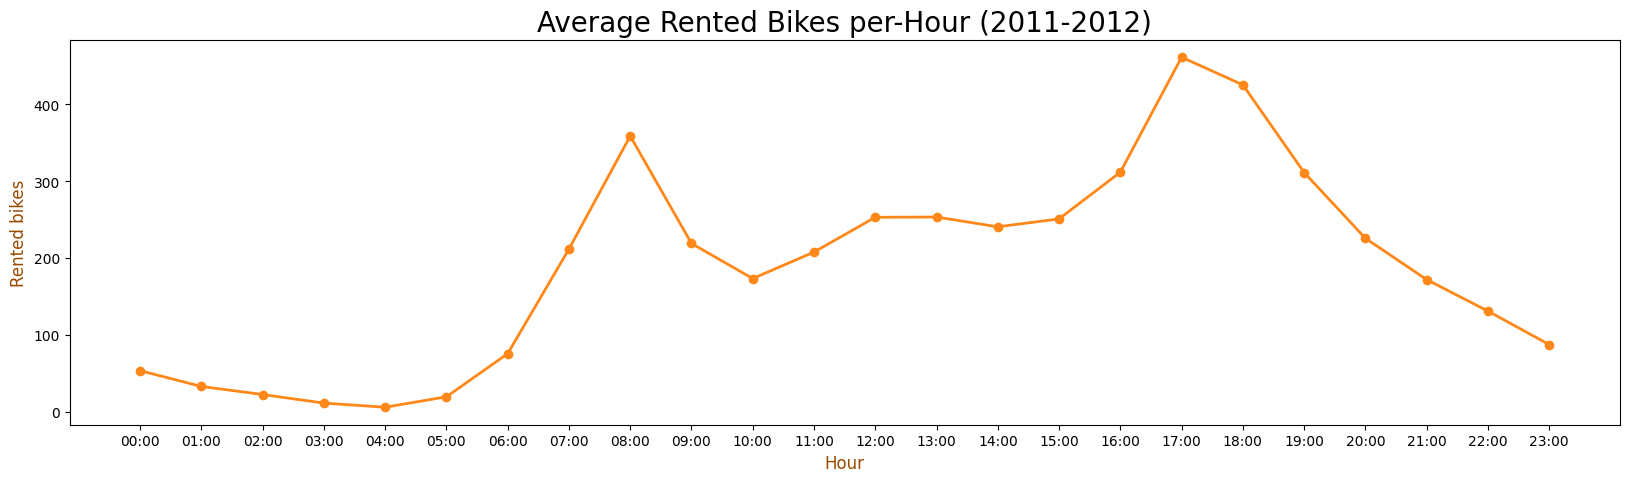

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(perhour_df["hour"], perhour_df["count"], marker='o', linewidth=2, color="#ff8819")
plt.title("Average Rented Bikes per-Hour (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Hour", color="#994a00", fontsize=12)
plt.ylabel("Rented bikes", color="#994a00", fontsize=12)
plt.show()

#### hari

In [25]:
perday_df = hour_df.groupby(by="weekday").agg(count=("count", "mean")).reset_index()
order = [3, 1, 5, 6, 4, 0, 2]
perday_df = perday_df.reindex(order)
perday_df

,weekday,count
3,Sunday,177.468825
1,Monday,183.744655
5,Tuesday,191.238891
6,Wednesday,191.130505
4,Thursday,196.436665
0,Friday,196.135907
2,Saturday,190.209793


<ipython-input-26-18020f58abbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


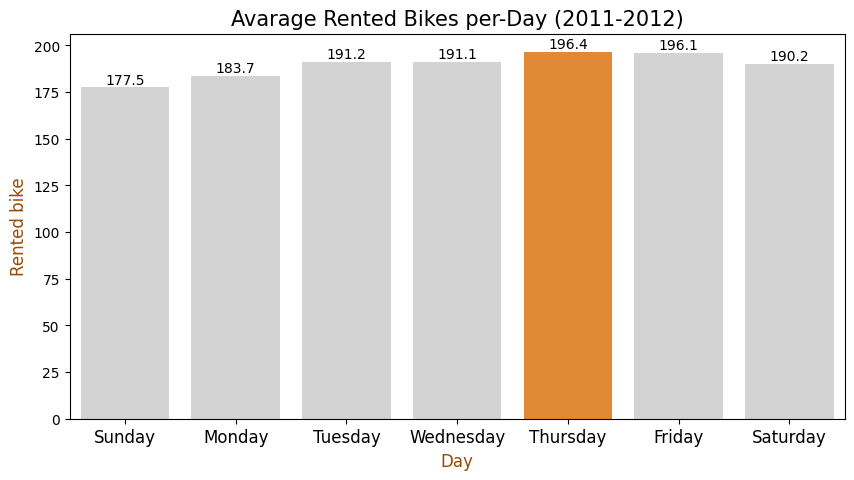

In [26]:
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#ff8819", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y="count",
    x="weekday",
    data=perday_df,
    palette=colors
)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,1)}', (x + width/2, y + height*1.01), ha='center', fontsize = 'medium')

plt.title("Avarage Rented Bikes per-Day (2011-2012)", loc="center", fontsize=15)
plt.xlabel("Day", color="#994a00", fontsize=12)
plt.ylabel("Rented bike", color="#994a00", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### cuaca

In [27]:
perweather_df = hour_df.groupby(by="weather").agg(count=("count", "mean")).reset_index()
perweather_df

,weather,count
0,Cloudy,204.869272
1,Mist,175.165493
2,Rain,111.579281
3,Storm,74.333333


<ipython-input-28-2d46f80fa55b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


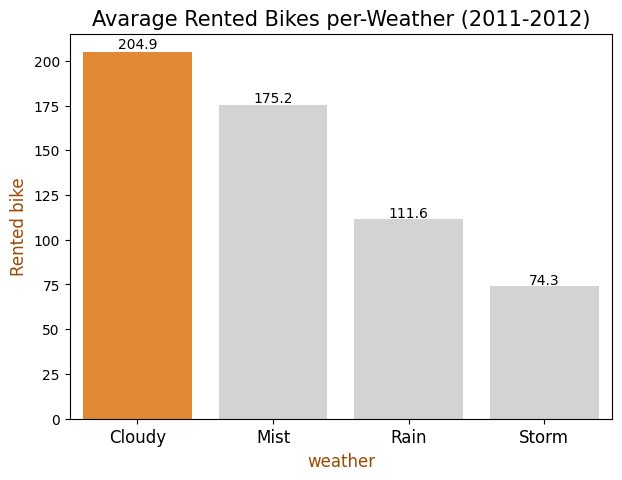

In [28]:
colors = ["#ff8819", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    y="count",
    x="weather",
    data=perweather_df,
    palette=colors
)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,1)}', (x + width/2, y + height*1.01), ha='center', fontsize = 'medium')

plt.title("Avarage Rented Bikes per-Weather (2011-2012)", loc="center", fontsize=15)
plt.xlabel("weather", color="#994a00", fontsize=12)
plt.ylabel("Rented bike", color="#994a00", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### musim

In [29]:
perseason_df = hour_df.groupby(by="season").agg(count=("count", "mean")).reset_index()
perseason_df

,season,count
0,Fall,236.016237
1,Spring,111.114569
2,Summer,208.344069
3,Winter,198.868856


<ipython-input-30-3259ec9b775c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


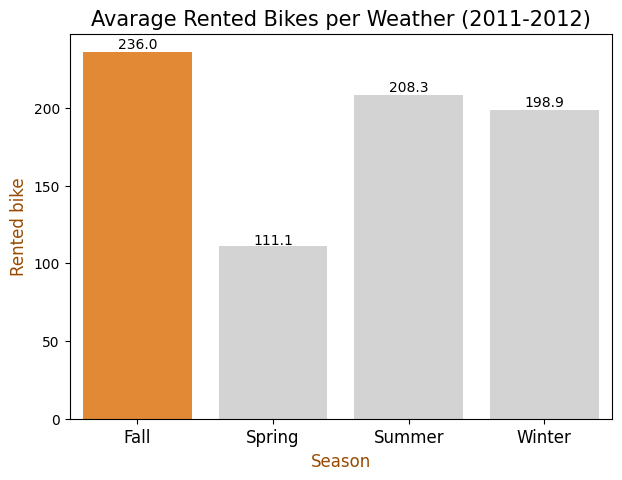

In [30]:
colors = ["#ff8819", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    y="count",
    x="season",
    data=perseason_df,
    palette=colors
)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,1)}', (x + width/2, y + height*1.01), ha='center', fontsize = 'medium')

plt.title("Avarage Rented Bikes per Weather (2011-2012)", loc="center", fontsize=15)
plt.xlabel("Season", color="#994a00", fontsize=12)
plt.ylabel("Rented bike", color="#994a00", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: `Bagaimana pertumbuhan penyewaan sepeda oleh registered users pada tahun 2011 dan tahun 2012?`

#### Tahun 2011

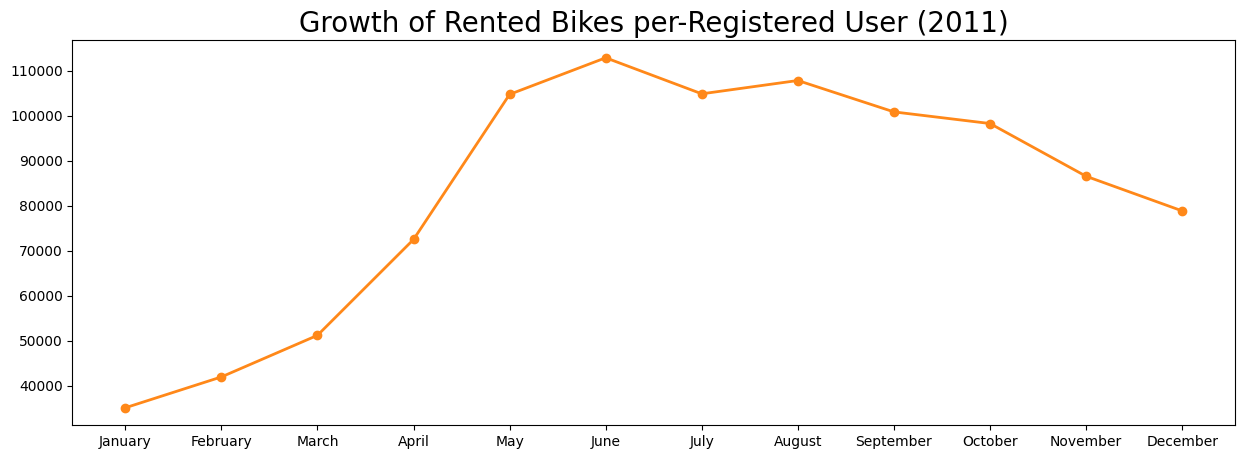

In [31]:
bulanan = bulan_11.groupby(by="datetime").agg(count=("registered", "sum")).reset_index()
order = [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]
bulanan = bulanan.reindex(order)

plt.figure(figsize=(15, 5))
plt.plot(bulanan["datetime"], bulanan["count"], marker='o', linewidth=2, color="#ff8819")
plt.title("Growth of Rented Bikes per-Registered User (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Tahn 2012

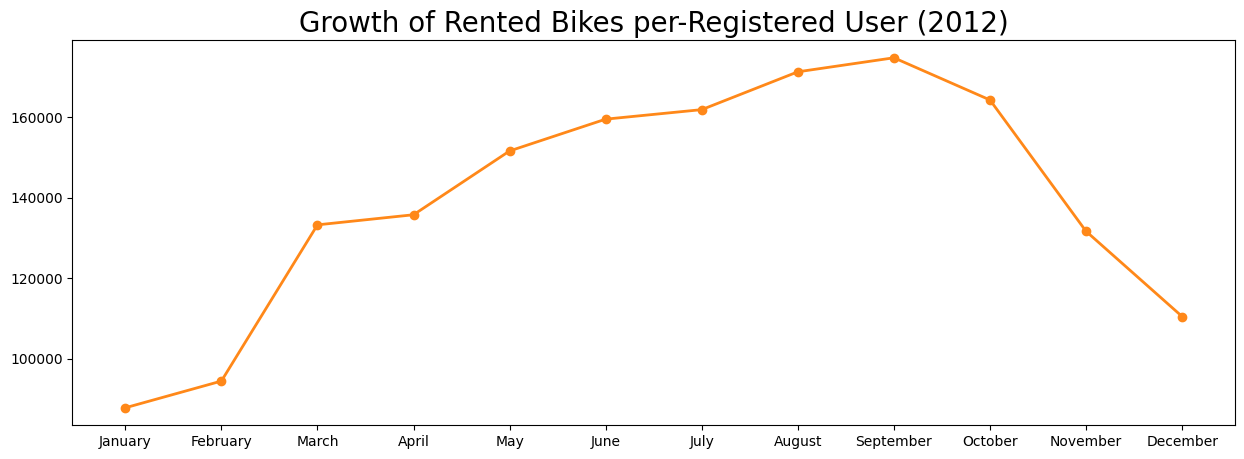

In [32]:
bulanin = bulan_12.groupby(by="datetime").agg(count=("registered", "sum")).reset_index()
order = [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]
bulanin = bulanin.reindex(order)

plt.figure(figsize=(15, 5))
plt.plot(bulanin["datetime"], bulanin["count"], marker='o', linewidth=2, color="#ff8819")
plt.title("Growth of Rented Bikes per-Registered User (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Setelah data di visualisasikan, terlihat tren yang signifikan pada chart jam, cuaca, musim, dan pertumbuhan penyewaan oleh pengguna terdaftar.
- Sedangkan, tren tidak terlihat terlalu signifikan pada chart penyewaan per-hari.

## Menyimpan Berkas Data Bersih

In [33]:
hour_df.to_csv("main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

In [34]:
# tidak ada analisis lanjutan yang saya tambahkan

## Conclusion

- Kesimpulan dari pertanyaan pertama (1): `Bagaimana pengaruh kondisi cuaca, musim, dan waktu dalam perilaku penyewaan sepeda?` Jawabannya pada **jam-jam berangkat kerja** seperti pada rentang **jam 06:00 - 09:00**, dan **jam-jam pulang kerja** seperti pada rentang jam **16:00 - 19:00** merupakan waktu yang menghasilkan angka penyewaan sepeda tertinggi. Selain itu, **hari Kamis/*Thursday*, cuaca cerah berawan/*Cloudy*, dan musim gugur/*Fall***, merupakan kondisi yang menghasilkan angka penyewaan sepeda tertinggi.
- Kesimpulan dari pertanyaan kedua (2): `Bagaimana pertumbuhan penyewaan sepeda oleh registered users pada tahun 2011 dan tahun 2012?` Jawabannya pada **bulan Maret - Juni tahun 2011**, terdapat tren kenaikan jumlah penyewaan sepeda oleh *registered* users. Sedangkan pada **tahun 2012**, tren kenaikan terjadi pada bulan **Mei - September**.